In [1]:
from module.EmbeddedAttackModel import *
from module.utils import * 
from module.gs_mim import GradSmoothMomentumIterativeMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

batch_shape = (30, 299, 299, 3)
datag = dev_data_generater(batch_shape=batch_shape)



Using TensorFlow backend.


In [5]:
batch_shape = (30, 299, 299, 3)
datag = dev_data_generater(batch_shape=batch_shape)
name = 'inception_v1'
T1 = TargetModel(batch_shape, 110, name=name)
PredictBatch(T1, datag)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
30 30.0 30
30 60.0 60
30 90.0 90
20 110.0 110
Predict  runs: 1.81 s
batchs 4 Accuracy 1.0


1.0

In [3]:
name = 'inception_v1'
T1 = TargetModel(batch_shape, 110, name=name)
name = 'resnetv1_50'
T2 = TargetModel(batch_shape, 110, name=name)
name = 'vgg_16'
T3 = TargetModel(batch_shape, 110, name=name)

In [4]:
A = EmbeddedAttackModel(batch_shape, 110)
A.add_model(T1)
# A.add_model(T2)
# A.add_model(T3)

attack_params = {"ep_ratio":0.2, "nb_iter":10, 'y':Y}
# Xadv = AttackHelper(A, X, Y, MomentumIterativeMethod, attack_params)
# Xadv = AttackHelper(A, X, Y, GradSmoothMomentumIterativeMethod, attack_params)
Xadv = AttackBatch(A, datag, GradSmoothMomentumIterativeMethod, attack_params, max_iter=2)
plot_images(X, Xadv, n=3)

PredictBatch(T3, datag)

NameError: name 'Y' is not defined

{'ep_ratio': 0.3, 'nb_iter': 10, 'y': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'eps': 76.5, 'eps_iter': 7.65, 'clip_min': 0, 'clip_max': 255}


D:\Develop\IJCAI2019\IJCAI19_AliAAAC\module\gs_mim.py:204: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
Attack runs: 19.21 s
L2 46.44056023948076
INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 predict runs: 1.39 s
inception_v1 predict accuracy : 0.0
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 1.80 s
resnetv1_50 predict accuracy : 0.0


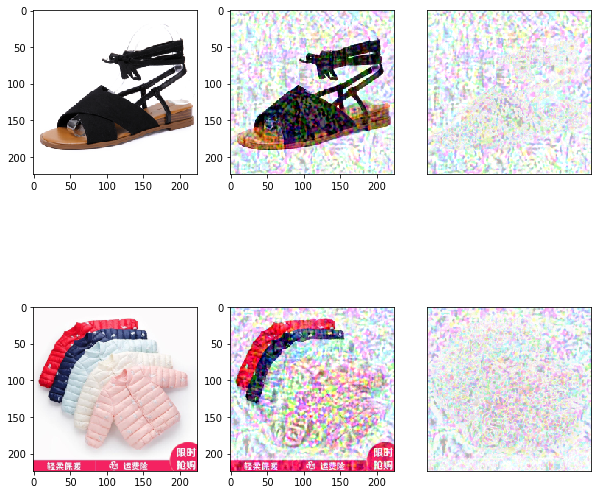

INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt


InternalError: Dst tensor is not initialized.
	 [[{{node save/RestoreV2/_55}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_60_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

In [4]:
A = EmbeddedAttackModel(batch_shape, 110)
A.add_model(T1)
A.add_model(T2)
# A.add_model(T3)

attack_params = {"ep_ratio":0.3, "nb_iter":10, 'y':Y}
Xadv = AttackHelper(A, X, Y, GradSmoothMomentumIterativeMethod, attack_params)
plot_images(X, Xadv, n=2)

T3.predict(Xadv, Y)

In [6]:
g = tf.Graph()

In [7]:
t

AttributeError: 'Graph' object has no attribute 'reset'